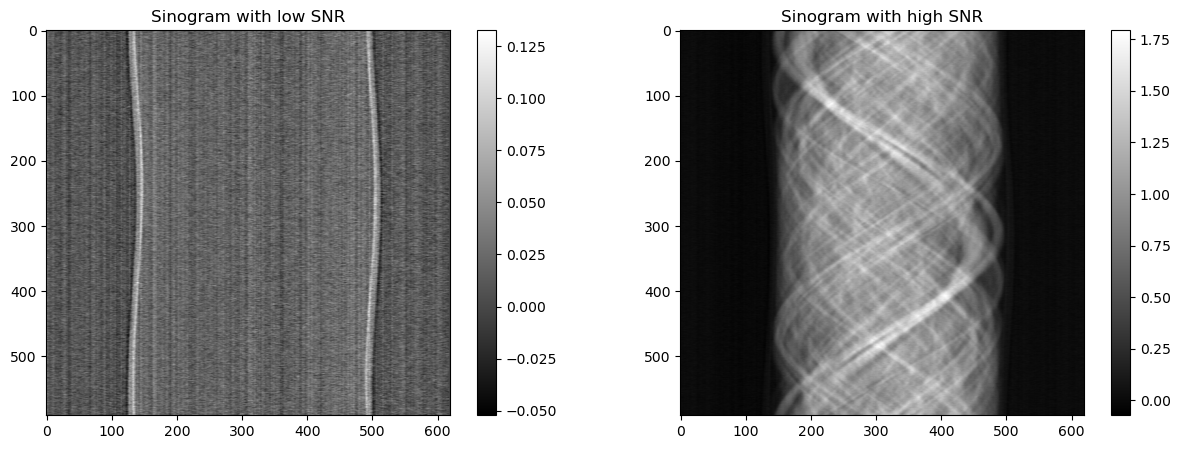

In [1]:
import os
import h5py
import matplotlib.pyplot as plt
from bm3dornl.bm3d import bm3d_ring_artifact_removal_ms

# Set the GPU device ID to 0 for this notebook session
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

this_dir = os.path.abspath("")
data_dir = os.path.join(this_dir, '../tests/bm3dornl-data')
datafile = os.path.join(data_dir, 'tomostack_small.h5')

# Load the data and select a noisy sinogram
with h5py.File(datafile, 'r') as f:
    tomo_stack_noisy = f['noisy_tomostack'][:]

# Select a sinogram with low SNR
sino_low_snr = tomo_stack_noisy[:, 10, :]

# Select a sinogram with high SNR
sino_high_snr = tomo_stack_noisy[:, 250, :]

# Plot the sinograms
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(sino_low_snr, cmap='gray')
plt.colorbar()
plt.title('Sinogram with low SNR')
plt.subplot(122)
plt.imshow(sino_high_snr, cmap='gray')
plt.colorbar()
plt.title('Sinogram with high SNR')
plt.show()

In [2]:
block_matching_kwargs: dict = {
    "patch_size": (8, 8),
    "stride": 2,
    "background_threshold": 0.0,
    "cut_off_distance": (64, 64),
    "num_patches_per_group": 32,
    "padding_mode": "circular",
}

filter_kwargs: dict = {
    "filter_function": "fft",
    "shrinkage_factor": 4e-2,
}

kwargs = {
    "mode": "simple",
    "k": 1,
    "block_matching_kwargs": block_matching_kwargs,
    "filter_kwargs": filter_kwargs,
    "scale_factor_base": 2,
}

In [3]:
sino_bm3dornl = bm3d_ring_artifact_removal_ms(
    sinogram=sino_low_snr,
    **kwargs,
)

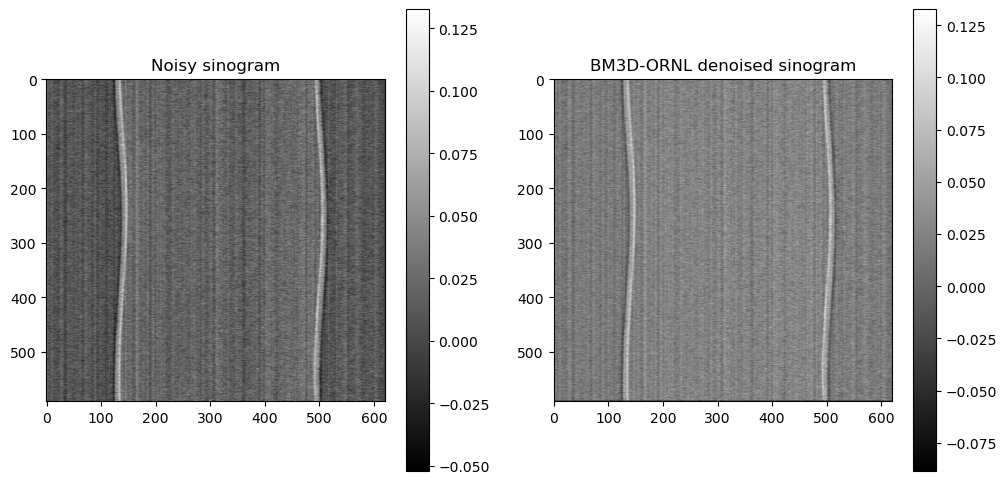

In [4]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sino_low_snr, cmap="gray")
plt.title("Noisy sinogram")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(sino_bm3dornl, cmap="gray")
plt.title("BM3D-ORNL denoised sinogram")
plt.colorbar()
plt.show()

In [5]:
sino_bm3dornl = bm3d_ring_artifact_removal_ms(
    sinogram=sino_high_snr,
    **kwargs,
)

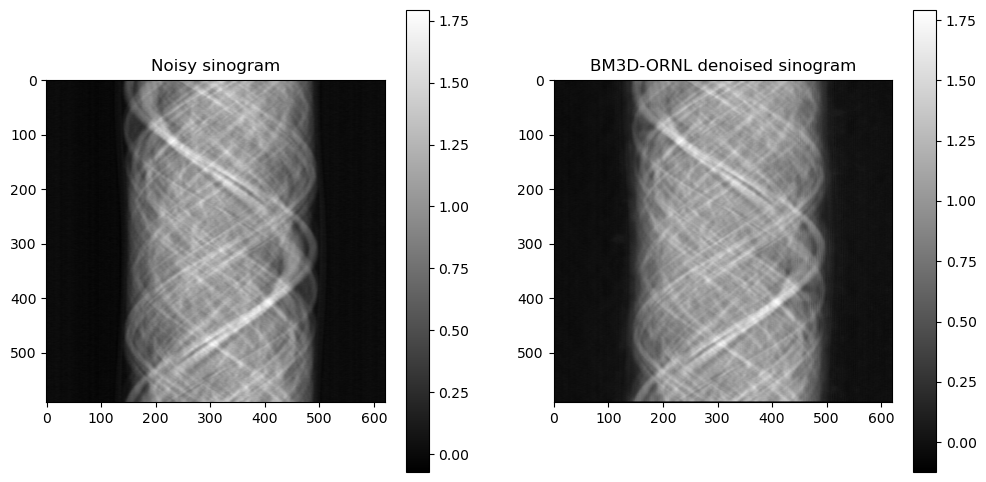

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sino_high_snr, cmap="gray")
plt.title("Noisy sinogram")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(sino_bm3dornl, cmap="gray")
plt.title("BM3D-ORNL denoised sinogram")
plt.colorbar()
plt.show()